In [1]:
import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt
import PIL.Image as Image
import os

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential



   

In [2]:
image_shape=(224,224)
classifier=tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=image_shape+(3,))
])

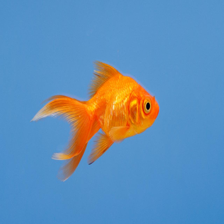

In [3]:
goldfish = Image.open("/kaggle/input/goldfishpic/goldfish.jpeg").resize(image_shape)
goldfish

In [4]:
goldfish = np.array(goldfish)/255.0
goldfish.shape

(224, 224, 3)

In [5]:
goldfish[np.newaxis, ...]

array([[[[0.30588235, 0.56078431, 0.78039216],
         [0.30980392, 0.56470588, 0.78431373],
         [0.30980392, 0.56470588, 0.78431373],
         ...,
         [0.3372549 , 0.58431373, 0.79607843],
         [0.33333333, 0.58039216, 0.79215686],
         [0.33333333, 0.58039216, 0.79215686]],

        [[0.30196078, 0.55686275, 0.77647059],
         [0.30588235, 0.56078431, 0.78039216],
         [0.30980392, 0.56470588, 0.78431373],
         ...,
         [0.33333333, 0.58039216, 0.79215686],
         [0.33333333, 0.58039216, 0.79215686],
         [0.33333333, 0.58039216, 0.79215686]],

        [[0.30980392, 0.56470588, 0.78431373],
         [0.30588235, 0.56078431, 0.78039216],
         [0.30588235, 0.56078431, 0.78039216],
         ...,
         [0.32941176, 0.57647059, 0.78823529],
         [0.32941176, 0.57647059, 0.78823529],
         [0.3372549 , 0.58431373, 0.79607843]],

        ...,

        [[0.27058824, 0.54117647, 0.77647059],
         [0.27058824, 0.5372549 , 0.77647059]

In [6]:
result = classifier.predict(goldfish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 827ms/step


(1, 1001)

In [7]:
predictedLabel = np.argmax(result)
predictedLabel

2

In [8]:
labels = []
with open("/kaggle/input/image-names/image_names.txt", "r") as f:
    labels = f.read().splitlines()
labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [9]:
labels[predictedLabel]

'goldfish'

Flower Classification

In [10]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
direc = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


228813984/228813984 [==============================] - 8s 0us/step


In [11]:
import pathlib
direc = pathlib.Path(direc)
direc

PosixPath('datasets/flower_photos')

In [12]:
list(direc.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/5917253022_4e3142d48b_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/21518663809_3d69f5b995_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3858508462_db2b9692d1.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/21728822928_9f6817325a_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8249000137_eddfffa380_n.jpg')]

In [13]:
count = len(list(direc.glob('*/*.jpg')))
count

3670

In [14]:
flowers = {
    'rose': list(direc.glob('roses/*')),
    'daisy': list(direc.glob('daisy/*')),
    'dandelion': list(direc.glob('dandelion/*')),
    'sunflower': list(direc.glob('sunflowers/*')),
    'tulip': list(direc.glob('tulips/*')),
}

In [15]:
labels = {
    'rose': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflower': 3,
    'tulip': 4,
}

In [16]:
x, y = [], []

for flower_name, images in flowers.items():
    for image in images:
        img = cv2.imread(str(image))
        resized = cv2.resize(img,(224,224))
        x.append(resized)
        y.append(labels[flower_name])

In [17]:
x= np.array(x)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)


In [19]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [20]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model = hub.KerasLayer(
        feature_extractor_model, input_shape=(224, 224, 3), trainable=False)



In [21]:
num = 5

model = tf.keras.Sequential([
  pretrained_model,
  tf.keras.layers.Dense(num)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [22]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 61s 661ms/step - loss: 0.7596 - acc: 0.7180
Epoch 2/5
86/86 [==============================] - 54s 627ms/step - loss: 0.4052 - acc: 0.8608
Epoch 3/5
86/86 [==============================] - 54s 623ms/step - loss: 0.3169 - acc: 0.8993
Epoch 4/5
86/86 [==============================] - 54s 623ms/step - loss: 0.2654 - acc: 0.9179
Epoch 5/5
86/86 [==============================] - 55s 636ms/step - loss: 0.2273 - acc: 0.9342


In [23]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 19s 627ms/step - loss: 0.3732 - acc: 0.8725


[0.3731524646282196, 0.8725489974021912]